In [6]:
import graph_tool_extras as gte
import pandas as pd
import csv
import numpy as np

PATH = 'df_final.csv'

## Leitura dos dados em memória

Na melhor das situações, o arquivo é pequeno o suficiente para caber em memória e está em um formato suportado pelo [pandas](https://pandas.pydata.org/), como é justamente o caso do CSV.

In [7]:
df = pd.read_csv(PATH)

In [8]:
len(df)

100000

Nesse caso, podemos usar o método `head` para examinar as primeiras linhas e entender a organização dos dados.

In [9]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,user_id,movie_id,rating,timestamp,title,release_date,IMDb_URL,genres,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),Comedy,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,Crime|Film-Noir|Mystery|Thriller,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,Children|Comedy,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,Drama|Romance|War|Western,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,Crime|Drama,47,M,educator,55113


In [10]:
df = df.loc[df["genres"] != "unknown", :]

In [11]:
g = gte.load('movies_reposicionado4.net.gz')

d = np.array(gte.total_degree(g))

d = d[18:]

In [12]:
c = np.array(gte.burt_constraint(g))

c = c[18:]

In [13]:
genres = [
    "Action", "Adventure", "Animation", "Children", "Comedy", "Crime",
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical",
    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

len(genres)

18

In [14]:
len(movies)

NameError: name 'movies' is not defined

In [9]:
len(movies) + len(genres)

NameError: name 'movies' is not defined

In [15]:
len(set(df["movie_id"]))

1680

In [16]:
movies = list(set(df["movie_id"]))  # ou uma lista customizada com ordem específica

ratings_map = df.groupby("movie_id")["rating"].mean().to_dict()
ratings = [ratings_map.get(movie_id) for movie_id in movies]

ratings

[3.8783185840707963,
 3.2061068702290076,
 3.033333333333333,
 3.550239234449761,
 3.302325581395349,
 3.576923076923077,
 3.798469387755102,
 3.9954337899543377,
 3.8963210702341136,
 3.831460674157303,
 3.847457627118644,
 4.385767790262173,
 3.4184782608695654,
 3.9672131147540983,
 3.7781569965870307,
 3.2051282051282053,
 3.119565217391304,
 2.8,
 3.9565217391304346,
 3.4166666666666665,
 2.761904761904762,
 4.151515151515151,
 4.1208791208791204,
 3.4482758620689653,
 3.4436860068259385,
 3.452054794520548,
 3.1052631578947367,
 3.931159420289855,
 2.6666666666666665,
 3.945945945945946,
 3.6298701298701297,
 3.7901234567901234,
 3.4536082474226806,
 2.7142857142857144,
 2.1818181818181817,
 2.1538461538461537,
 2.25,
 3.0083333333333333,
 3.264367816091954,
 2.8947368421052633,
 3.081081081081081,
 3.804054054054054,
 3.0,
 3.3417721518987342,
 4.05,
 3.5555555555555554,
 3.601503759398496,
 4.094017094017094,
 3.3209876543209877,
 4.3584905660377355,
 3.45679012345679,
 3.76923

In [17]:
ratings_map

{1: 3.8783185840707963,
 2: 3.2061068702290076,
 3: 3.033333333333333,
 4: 3.550239234449761,
 5: 3.302325581395349,
 6: 3.576923076923077,
 7: 3.798469387755102,
 8: 3.9954337899543377,
 9: 3.8963210702341136,
 10: 3.831460674157303,
 11: 3.847457627118644,
 12: 4.385767790262173,
 13: 3.4184782608695654,
 14: 3.9672131147540983,
 15: 3.7781569965870307,
 16: 3.2051282051282053,
 17: 3.119565217391304,
 18: 2.8,
 19: 3.9565217391304346,
 20: 3.4166666666666665,
 21: 2.761904761904762,
 22: 4.151515151515151,
 23: 4.1208791208791204,
 24: 3.4482758620689653,
 25: 3.4436860068259385,
 26: 3.452054794520548,
 27: 3.1052631578947367,
 28: 3.931159420289855,
 29: 2.6666666666666665,
 30: 3.945945945945946,
 31: 3.6298701298701297,
 32: 3.7901234567901234,
 33: 3.4536082474226806,
 34: 2.7142857142857144,
 35: 2.1818181818181817,
 36: 2.1538461538461537,
 37: 2.25,
 38: 3.0083333333333333,
 39: 3.264367816091954,
 40: 2.8947368421052633,
 41: 3.081081081081081,
 42: 3.804054054054054,
 43: 

In [18]:
ratings

[3.8783185840707963,
 3.2061068702290076,
 3.033333333333333,
 3.550239234449761,
 3.302325581395349,
 3.576923076923077,
 3.798469387755102,
 3.9954337899543377,
 3.8963210702341136,
 3.831460674157303,
 3.847457627118644,
 4.385767790262173,
 3.4184782608695654,
 3.9672131147540983,
 3.7781569965870307,
 3.2051282051282053,
 3.119565217391304,
 2.8,
 3.9565217391304346,
 3.4166666666666665,
 2.761904761904762,
 4.151515151515151,
 4.1208791208791204,
 3.4482758620689653,
 3.4436860068259385,
 3.452054794520548,
 3.1052631578947367,
 3.931159420289855,
 2.6666666666666665,
 3.945945945945946,
 3.6298701298701297,
 3.7901234567901234,
 3.4536082474226806,
 2.7142857142857144,
 2.1818181818181817,
 2.1538461538461537,
 2.25,
 3.0083333333333333,
 3.264367816091954,
 2.8947368421052633,
 3.081081081081081,
 3.804054054054054,
 3.0,
 3.3417721518987342,
 4.05,
 3.5555555555555554,
 3.601503759398496,
 4.094017094017094,
 3.3209876543209877,
 4.3584905660377355,
 3.45679012345679,
 3.76923

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np

y_normalized = [(val - 1) / (5 - 1) for val in ratings]  # supondo y ∈ [1, 5]

# Converte as listas para arrays numpy e redimensiona X para ser uma matriz (n_samples, n_features)
X = d.reshape(-1, 1)
Y = np.array(y_normalized)

# Cria e treina o modelo
model = LogisticRegression()
model.fit(X, Y)

# Agora você pode prever valores ou probabilidades:
predictions = model.predict(X)
probabilities = model.predict_proba(X)[:, 1]  # probabilidade de classe positiva


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Optimization terminated successfully.
         Current function value: 0.641517
         Iterations 6


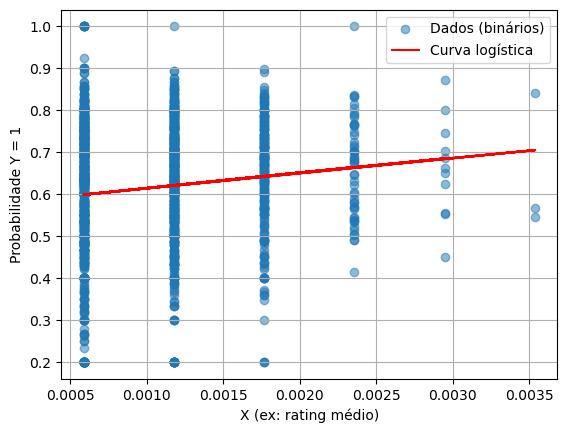

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1680
Model:                          Logit   Df Residuals:                     1678
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 May 2025   Pseudo R-squ.:                 -0.3153
Time:                        14:34:38   Log-Likelihood:                -1077.7
converged:                       True   LL-Null:                       -819.42
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3091      0.112      2.765      0.006       0.090       0.528
x1           159.5560     99.546      1.603      0.109     -35.551     354.663


In [18]:
from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Normaliza y para [0, 1] e transforma em classes 0/1 por threshold
y_norm = np.array([(val - 0) / 5 for val in ratings])

X_logit = sm.add_constant(c)  # Adiciona intercepto

# Ajusta modelo logístico
model = Logit(y_norm, X_logit)
result = model.fit()

# Predição de probabilidade
preds = result.predict(X_logit)

# Visualização
plt.scatter(c, y_norm, label="Dados (binários)", alpha=0.5)
plt.plot(c, preds, color='red', label='Curva logística')
plt.xlabel("X (ex: rating médio)")
plt.ylabel("Probabilidade Y = 1")
plt.grid(True)
plt.legend()
plt.show()

# Resumo
print(result.summary())


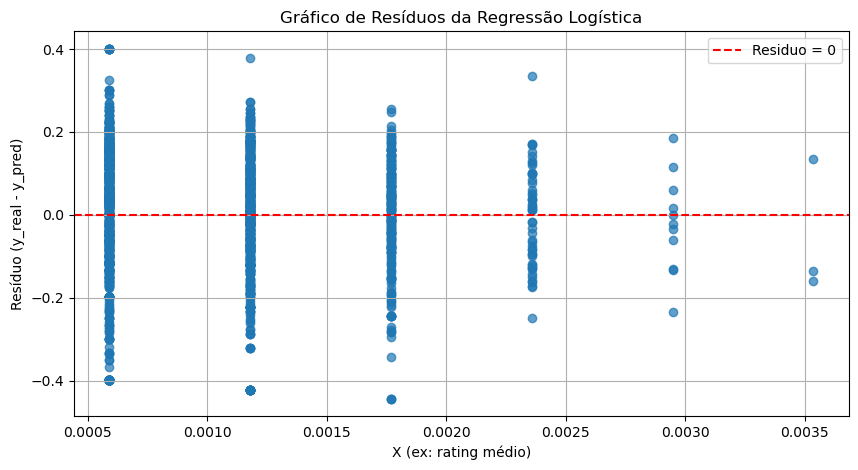

In [22]:
# 3. Obter predições e resíduos
y_pred_prob = result.predict(X_logit)              # Probabilidades previstas
residuals = y_norm - y_pred_prob              # Resíduos = valor observado - previsto

# 4. Plotar gráfico de resíduos
plt.figure(figsize=(10, 5))
plt.scatter(c, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel("X (ex: rating médio)")
plt.ylabel("Resíduo (y_real - y_pred)")
plt.title("Gráfico de Resíduos da Regressão Logística")
plt.grid(True)
plt.legend()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

y_norm = np.array([(val - 0) / 5 for val in ratings])

In [34]:
 ### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.Logit(Y,X_cp)
    results = model.fit()
    
    return results

In [35]:
my_df = pd.DataFrame({
    'ratings': y_norm,
    'degree': d,
    "restricao": c
})

my_df.head()

,ratings,degree,restricao
0,0.775664,0.001768,0.333333
1,0.641221,0.001768,0.333333
2,0.606667,0.000589,1.000000
3,0.710048,0.001768,0.333333
4,0.660465,0.001768,0.333333


In [36]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ratings    1680 non-null   float64
 1   degree     1680 non-null   float64
 2   restricao  1680 non-null   float64
dtypes: float64(3)
memory usage: 39.5 KB


In [37]:
X = my_df[["degree", "restricao"]]
Y = my_df["ratings"]

In [38]:
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.641438
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ratings   No. Observations:                 1680
Model:                          Logit   Df Residuals:                     1677
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 May 2025   Pseudo R-squ.:                 -0.3151
Time:                        13:11:32   Log-Likelihood:                -1077.6
converged:                       True   LL-Null:                       -819.42
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5141      0.591      0.870      0.384      -0.644       1.672
degree        73.0562    263.838      0.277      0.782    -444.057     590.170
restricao     -0.1639      0.464     -0.353      0.724      -1.073       0.745
==============================================================================
"""

In [40]:
results.plot_residuals()

AttributeError: 'LogitResults' object has no attribute 'plot_residuals'

In [41]:
import regression as reg
import pandas as pd
import numpy as np

In [44]:
result = reg.logistic(data=my_df, formula='ratings ~ restricao')
result.micro_summary()

Optimization terminated successfully.
         Current function value: 0.641477
         Iterations 4


variable,coefficient,std error,p-value
restricao,-0.283036,0.174182,0.104174


46.34% of average residuals inside


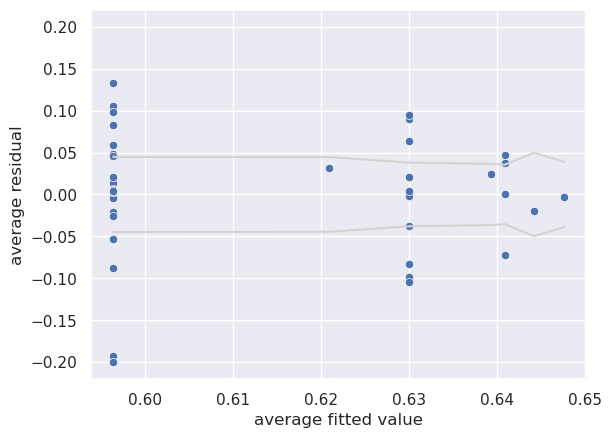

In [45]:
result.plot_residuals()

(array([831.,   0., 569.,   0., 215.,   0.,  51.,   0.,  11.,   3.]),
 array([0.00058928, 0.00088391, 0.00117855, 0.00147319, 0.00176783,
        0.00206246, 0.0023571 , 0.00265174, 0.00294638, 0.00324101,
        0.00353565]),
 <BarContainer object of 10 artists>)

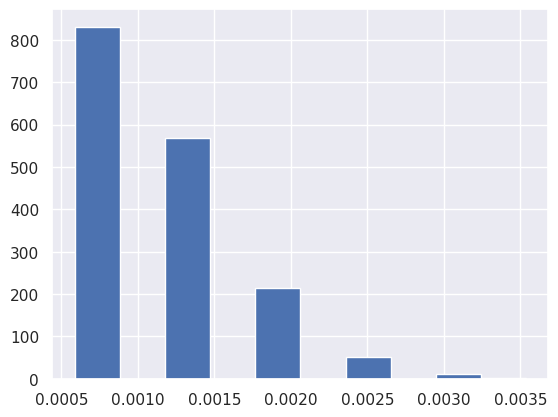

In [46]:
plt.hist(d)

In [47]:
log_degree = np.log(d)

(array([831.,   0.,   0., 569.,   0.,   0., 215.,  51.,  11.,   3.]),
 array([-7.43661727, -7.25744132, -7.07826537, -6.89908942, -6.71991348,
        -6.54073753, -6.36156158, -6.18238564, -6.00320969, -5.82403374,
        -5.6448578 ]),
 <BarContainer object of 10 artists>)

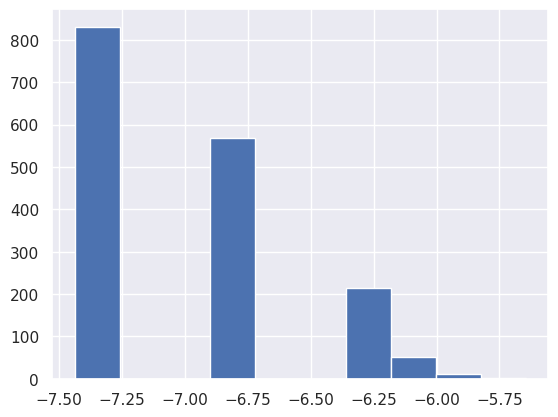

In [48]:
plt.hist(log_degree)

In [49]:
my_df2= pd.DataFrame({
    'ratings': y_norm,
    'degree': log_degree,
})

my_df2.head()

,ratings,degree
0,0.775664,-6.338005
1,0.641221,-6.338005
2,0.606667,-7.436617
3,0.710048,-6.338005
4,0.660465,-6.338005


In [50]:
result = reg.logistic(data=my_df2, formula='ratings ~ degree')
result.micro_summary()

Optimization terminated successfully.
         Current function value: 0.641437
         Iterations 4


variable,coefficient,std error,p-value
degree,0.180363,0.109518,0.099583


51.22% of average residuals inside


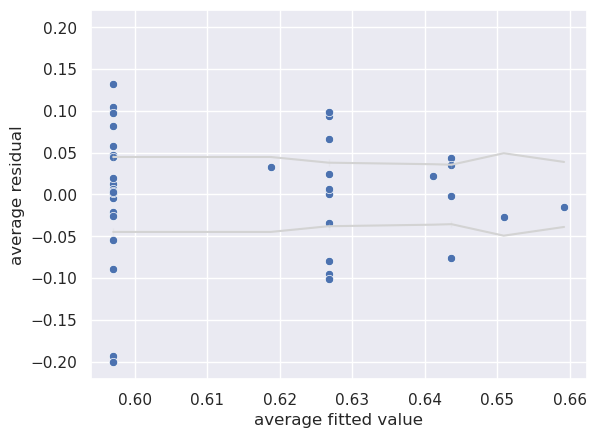

In [51]:
result.plot_residuals()

In [54]:
my_df3 = pd.DataFrame({
    'ratings': y_norm,
    'degree': log_degree,
    "restricao": c
})

my_df3.head()

,ratings,degree,restricao
0,0.775664,-6.338005,0.333333
1,0.641221,-6.338005,0.333333
2,0.606667,-7.436617,1.000000
3,0.710048,-6.338005,0.333333
4,0.660465,-6.338005,0.333333


In [55]:
result = reg.logistic(data=my_df3, formula='ratings ~ degree + restricao')
result.micro_summary()

Optimization terminated successfully.
         Current function value: 0.641437
         Iterations 5


variable,coefficient,std error,p-value
degree,0.193100,0.685993,0.778334
restricao,0.020540,1.091994,0.984993


(array([ 14., 266.,   0.,   0., 569.,   0.,   0.,   0.,   0., 831.]),
 array([0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
        0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
        1.        ]),
 <BarContainer object of 10 artists>)

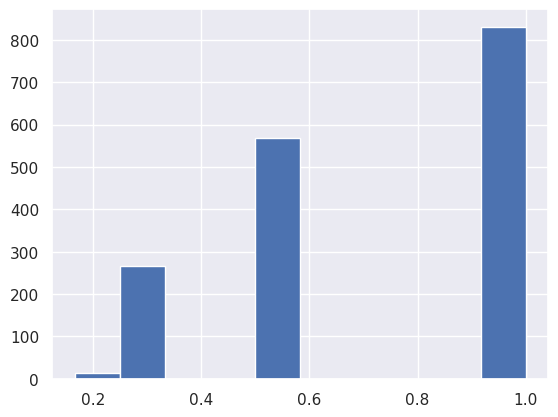

In [56]:
plt.hist(c)

In [57]:
log_restricao = np.log(c)


In [58]:
my_df4 = pd.DataFrame({
    'ratings': y_norm,
    'degree': log_degree,
    "restricao": log_restricao
})

my_df4.head()

,ratings,degree,restricao
0,0.775664,-6.338005,-1.098612
1,0.641221,-6.338005,-1.098612
2,0.606667,-7.436617,0.000000
3,0.710048,-6.338005,-1.098612
4,0.660465,-6.338005,-1.098612


In [59]:
result = reg.logistic(data=my_df4, formula='ratings ~ restricao')
result.micro_summary()

Optimization terminated successfully.
         Current function value: 0.641437
         Iterations 4


variable,coefficient,std error,p-value
restricao,-0.180363,0.109518,0.099583


In [60]:
result = reg.logistic(data=my_df4, formula='ratings ~ degree + restricao')
result.micro_summary()

         Current function value: 0.641437
         Iterations: 35


/opt/miniconda/envs/jupyterlab/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


variable,coefficient,std error,p-value
degree,-0.047880,243843.765003,1.000000
restricao,-0.228243,243843.765003,0.999999


51.22% of average residuals inside


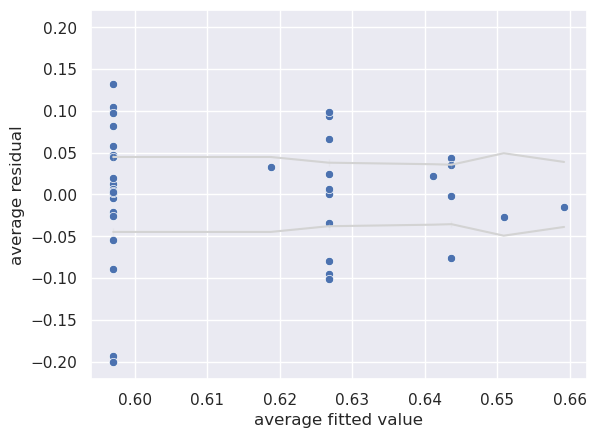

In [61]:
result.plot_residuals()